In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
NAMES = ['CENTRALWAVELENGTH', 'BANDWIDTH', 'PL_TRANDEP', 'PL_TRANDEPERR1', 'PL_TRANDEPERR2']
df = pd.read_csv('../WASP_96_b_3.11667_5310_1.tbl', comment='\\', delim_whitespace=True, header=4, usecols=[0,1,2,3,4], names =NAMES)

df[['CENTRALWAVELENGTH', 'PL_TRANDEP', 'PL_TRANDEPERR1']].to_csv('WASP-96b_spectrum_assignment3_taskB.dat')

/tmp/ipykernel_16033/1996770483.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../WASP_96_b_3.11667_5310_1.tbl', comment='\\', delim_whitespace=True, header=4, usecols=[0,1,2,3,4], names =NAMES)


Text(0, 0.5, 'Transit Depth (%)')

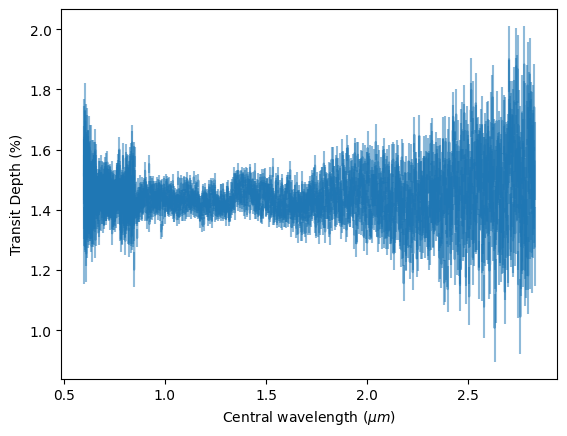

In [14]:
plt.errorbar(df['CENTRALWAVELENGTH'], df['PL_TRANDEP'], df['PL_TRANDEPERR1'], alpha=0.5)
plt.xlabel(r'Central wavelength ($\mu m$)')
plt.ylabel('Transit Depth (%)')

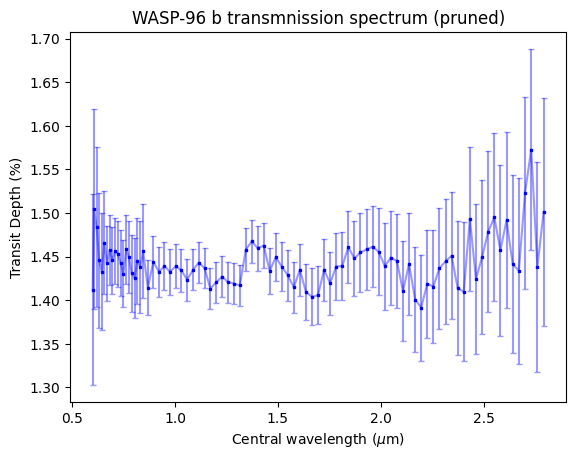

In [18]:
df_rol = df.rolling(30, step=30, min_periods=1).mean()
plt.errorbar(df_rol['CENTRALWAVELENGTH'], df_rol['PL_TRANDEP'], df_rol['PL_TRANDEPERR1'], capsize=2, alpha=0.4, color='blue')
plt.plot(df_rol['CENTRALWAVELENGTH'], df_rol['PL_TRANDEP'], color='blue', linestyle='', marker='s', markersize=2)
plt.xlabel(r'Central wavelength ($\mu$m)')
plt.ylabel('Transit Depth (%)')
plt.title('WASP-96 b transmnission spectrum (pruned)')
plt.savefig('WASP-96b_spectrum_assignment3_taskB.png')